In [0]:
import nltk
nltk.download('all')

In [85]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D,MaxPool1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam

import re,string,unicodedata
from bs4 import BeautifulSoup
from sklearn.preprocessing import LabelBinarizer

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer

print(tf.__version__)

2.2.0


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
catWiki = pd.read_csv("/content/catWiki.txt", sep='\n', header=None)
dogWiki = pd.read_csv("/content/dogWiki.txt", sep='\n', header=None)

catWiki.columns = ['text']
dogWiki.columns = ['text']

In [88]:
catWiki['class'] = 'cat'
dogWiki['class'] = 'dog'
data = catWiki
data = data.append(dogWiki)
data.head()

,text,class
0,The cat (Felis catus) is a domestic species of...,cat
1,The cat is similar in anatomy to the other fel...,cat
2,Female domestic cats can have kittens from spr...,cat
3,Cats were first domesticated in the Near East ...,cat
4,"As of 2017, the domestic cat was the second-mo...",cat


In [89]:
data.columns

Index(['text', 'class'], dtype='object')

In [0]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [0]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
    
#Apply function on text column
data['text']=data['text'].apply(denoise_text)

In [0]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Apply function on text column
data['text']=data['text'].apply(denoise_text)

In [94]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on text column
data['text']=data['text'].apply(remove_stopwords)

{'why', 'ain', 'ourselves', 'can', 'y', "couldn't", 'over', 'to', 'yours', 'were', 't', 'these', 'during', 'so', 'they', 'should', 'more', "won't", 'does', 'now', "mightn't", 'a', 'out', 'with', 'further', 'about', 'll', 'ma', 'through', "you've", 'won', 'few', 'while', 'am', 'and', "needn't", 'o', 'that', "shan't", 'do', 'on', 'me', 'very', 'd', "isn't", 'under', 'wasn', 'm', 'myself', 'into', 've', 'been', "she's", 'are', 'hasn', 'or', 'then', 'has', 'above', 'is', 'our', 'if', 'against', 'too', 'other', 'only', "that'll", "hasn't", 'which', 'of', 'herself', 's', 'both', 'who', 'himself', "haven't", 'aren', 'you', "wasn't", 'hers', "you'll", 'most', 'we', 'don', 'she', 'their', 'be', 'here', 'him', 'his', 'mightn', 'yourselves', 'whom', 'had', 'all', 'such', 'because', 'what', "wouldn't", 'each', 'down', 'in', "shouldn't", 'than', 'shan', 'i', 'hadn', 'as', 'shouldn', 'same', 'where', "you're", 'did', 'own', 'no', 'doing', 'up', 'not', 'once', "weren't", 'there', 'your', 'until', 'th

In [95]:
from sklearn.preprocessing import LabelBinarizer
#labeling the data
lb=LabelBinarizer()
#transformed Label data
label_data=lb.fit_transform(data['class'])
#label_data
print(label_data.shape)

# labeling convert the classes as cat as "0" and Dog as "1"

(290, 1)


In [96]:
#data.to_csv('/content/csvfiles/Boths_cats_and_dogs.csv')
data.head()

,text,class
0,cat ( Felis catus ) domestic species small car...,cat
1,cat similar anatomy felid species : strong fle...,cat
2,Female domestic cats kittens spring late autum...,cat
3,Cats first domesticated Near East around 7500 ...,cat
4,"2017 , domestic cat second-most popular pet Un...",cat


In [0]:
data['label'] = label_data

In [98]:
data

,text,class,label
0,cat ( Felis catus ) domestic species small car...,cat,0
1,cat similar anatomy felid species : strong fle...,cat,0
2,Female domestic cats kittens spring late autum...,cat,0
3,Cats first domesticated Near East around 7500 ...,cat,0
4,"2017 , domestic cat second-most popular pet Un...",cat,0
...,...,...,...
166,Art,dog,1
167,Main article : Cultural depictions dogs Wester...,dog,1
168,Cultural depictions dogs art extend back thous...,dog,1
169,Education appreciation,dog,1


**Word Counts with CountVectorizer**
The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

You can use it as follows:

Create an instance of the CountVectorizer class.
Call the fit() function in order to learn a vocabulary from one or more documents.
Call the transform() function on one or more documents as needed to encode each as a vector.
An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.




**Feature Engineering**

In [174]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = data['text']
# create the transform
vectorizer = CountVectorizer(min_df=5, max_features=37)
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'cat': 7, 'domestic': 11, 'species': 31, 'domesticated': 12, 'often': 24, 'feral': 14, 'human': 17, 'cats': 8, 'humans': 18, 'breeds': 6, 'body': 4, 'prey': 29, 'like': 20, 'social': 30, 'female': 13, 'two': 33, 'known': 19, 'pet': 27, 'pets': 28, 'first': 15, 'also': 0, 'may': 23, 'years': 36, 'animals': 1, 'behavior': 3, 'main': 21, 'article': 2, 'one': 25, 'many': 22, 'study': 32, 'health': 16, 'dog': 9, 'breed': 5, 'people': 26, 'dogs': 10, 'wolf': 34, 'wolves': 35}
(290, 37)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [175]:
print(vectorizer.vocabulary_)

{'cat': 7, 'domestic': 11, 'species': 31, 'domesticated': 12, 'often': 24, 'feral': 14, 'human': 17, 'cats': 8, 'humans': 18, 'breeds': 6, 'body': 4, 'prey': 29, 'like': 20, 'social': 30, 'female': 13, 'two': 33, 'known': 19, 'pet': 27, 'pets': 28, 'first': 15, 'also': 0, 'may': 23, 'years': 36, 'animals': 1, 'behavior': 3, 'main': 21, 'article': 2, 'one': 25, 'many': 22, 'study': 32, 'health': 16, 'dog': 9, 'breed': 5, 'people': 26, 'dogs': 10, 'wolf': 34, 'wolves': 35}


In [176]:
type(vector)

scipy.sparse.csr.csr_matrix

In [177]:
from sklearn.model_selection import train_test_split

# Split data to target (y) and features (X)
X = vector.toarray()
y = (np.array(data['label']))

# Here we split data to training and testing parts
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 0, stratify =y)
print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(X_train.shape, X_test.shape))

Train dataset shape: (232, 37), 
Test dataset shape: (58, 37)


In [178]:
#CNN accepst data in 3D
# reshape the data.
X_train= X_train.reshape(232,37,1)
X_test = X_test.reshape(58,37,1)
type(X_train)

numpy.ndarray

In [0]:
epochs = 50
model = Sequential()
model.add(Conv1D(filters=32,kernel_size=2, activation='relu', input_shape = (37,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))


In [180]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 36, 32)            96        
_________________________________________________________________
batch_normalization_14 (Batc (None, 36, 32)            128       
_________________________________________________________________
dropout_21 (Dropout)         (None, 36, 32)            0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 35, 64)            4160      
_________________________________________________________________
batch_normalization_15 (Batc (None, 35, 64)            256       
_________________________________________________________________
dropout_22 (Dropout)         (None, 35, 64)            0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2240)             

In [0]:
model.compile(optimizer=Adam(lr=0.00005),loss='binary_crossentropy',metrics=['accuracy'])

In [182]:
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
8/8 [==============================] - 0s 25ms/step - loss: 0.9941 - accuracy: 0.5647 - val_loss: 0.6821 - val_accuracy: 0.5862
Epoch 2/50
8/8 [==============================] - 0s 13ms/step - loss: 1.0717 - accuracy: 0.5086 - val_loss: 0.6785 - val_accuracy: 0.6034
Epoch 3/50
8/8 [==============================] - 0s 11ms/step - loss: 0.8451 - accuracy: 0.6078 - val_loss: 0.6737 - val_accuracy: 0.6724
Epoch 4/50
8/8 [==============================] - 0s 13ms/step - loss: 0.8299 - accuracy: 0.6293 - val_loss: 0.6683 - val_accuracy: 0.6897
Epoch 5/50
8/8 [==============================] - 0s 12ms/step - loss: 0.7251 - accuracy: 0.6379 - val_loss: 0.6630 - val_accuracy: 0.6897
Epoch 6/50
8/8 [==============================] - 0s 12ms/step - loss: 0.7169 - accuracy: 0.6379 - val_loss: 0.6573 - val_accuracy: 0.6897
Epoch 7/50
8/8 [==============================] - 0s 13ms/step - loss: 0.7878 - accuracy: 0.6724 - val_loss: 0.6510 - val_accuracy: 0.7069
Epoch 8/50
8/8 [===========

In [0]:
def plot_learningCurve(history,epoch):
  #plot training and validation accuracy values
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accracy')
  plt.ylabel('Accuracy')
  plt.xlabel("Epoch")
  plt.legend(['Train','Val'],loc ='upper left')
  plt.show()

  #plot training & valdiation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel("Epoch")
  plt.legend(['Train','Val'],loc ='upper left')
  plt.show()

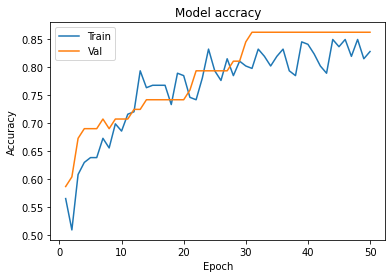

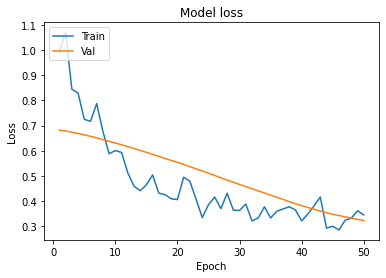

In [184]:
plot_learningCurve(history,epochs)

In [185]:
#for testing  given samples

testData = pd.read_csv("/content/testSentences.txt", sep='\n', header=None)
testData.columns = ['content']
testData

,content
0,This animal is similar to the other felid spec...
1,This animal is similar to the wolf and fox.
2,This animal can detect a drug when hidden.
3,One type of animal acts as a guard of things.
4,Whiskers coughed up a hairball today.
5,This animal can understand a hand signal if pr...
6,He has a kitten.
7,This animal will catch a mouse when it seems i...
8,He carried a python across the street.
9,Python programming with machine learning has n...


In [0]:
#set stopwords to english
stop=set(stopwords.words('english'))


#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on text column
testData['content']=testData['content'].apply(remove_stopwords)

In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = testData['content']

# create the transform
vectorizer = CountVectorizer(min_df=0, max_features=37)
# tokenize and build vocab
vectorizer.fit(text)
# summarize
#print(vectorizer.vocabulary_)
# encode document
highD_vector = vectorizer.transform(text)
# summarize encoded vector
print(highD_vector.shape)
print(type(highD_vector))
print(highD_vector.toarray())
highD_vector =highD_vector.toarray()

(10, 37)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
  0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  1]
 [0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0
  0]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
  0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0
  0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0]
 [0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
  0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
  0]]


In [188]:
highD_vector.shape

(10, 37)

In [0]:
import numpy as np 

flatten=highD_vector.flatten()
input_array = flatten.reshape([10, 37,1])


In [190]:
prediction = model.predict(input_array)
probability =prediction

for i in range(10):
  output =probability[i]
  print(output, sep='', end='')
  print("Dog") if output > 0.5 else print("cat")



# Save model
#model.save('classification_model.h5')

[0.83267546]Dog
[0.8564848]Dog
[0.17554471]cat
[0.5843016]Dog
[0.6556908]Dog
[0.6569063]Dog
[0.5942156]Dog
[0.47187203]cat
[0.37833437]cat
[0.3591253]cat
